# **Measuring the cumulative returns of semiconductor stocks**

### This project are aim to compare the returns of stocks (semiconductors)
_As we understand, semiconductors companies become highlight of the decades due to its role as foundation for such critical industries including AI, automotive, and renewable energy_


Source of Data: **Yahoo Finance**

### **1. Testing**
_Testing are used to re-check whether the python environment are already work or else_

In [21]:
HargaSaham = 25
JumlahSaham = 10
print ('jumlah saham yang saya miliki adalah: '+ str(HargaSaham*JumlahSaham))

jumlah saham yang saya miliki adalah: 250


In [22]:
values = [1,2,3,4,5,6,7,8,9,10]

print(type(values))

for i in values:
    print(i)

<class 'list'>
1
2
3
4
5
6
7
8
9
10


In [23]:
a = 20
b = 45

if a > b:
    print("a lebih besar daripada b")
elif b > a:
    print("b lebih besar daripada a")

b lebih besar daripada a


In [24]:
for i in values:
    if i > a:
        print(i)

### **2. Import Dataset**

In [25]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np


        _As we can see, there is problem regarding the pandas data reader. At this moment, I have no found the solution. So let it be 'as it is' for now_

### **3. Install Date Time**
_this step aim to set the range of time to analyse for our stocks_

In [26]:
endDate = dt.datetime.now()
print(endDate)

startDate = endDate - dt.timedelta(days = 365*5)
endDate, startDate

2023-08-22 00:36:04.053773


(datetime.datetime(2023, 8, 22, 0, 36, 4, 53773),
 datetime.datetime(2018, 8, 23, 0, 36, 4, 53773))

        we set the range of analysis for the last five year range from 2018 untul 2023. In this period, many event happen including: Trump's Trade War, Global Pandemic, and the last one as Biden's Trade War

### **4. Create a list of the stocks that we are interested in**

In [27]:
stocks = ['ASML', 'NVDA', 'TSM', 'MPWR', 'ACLS']

### **5. Download the stock data from Yahoo Finance**

In [28]:
df = yf.download(stocks, start = startDate, end = endDate)

[*********************100%%**********************]  5 of 5 completed


### **6. Describing and Observing our Dataset**

In [29]:
df.tail

<bound method NDFrame.tail of              Adj Close                                                 \
                  ACLS        ASML        MPWR        NVDA        TSM   
Date                                                                    
2018-08-23   19.400000  189.706512  139.613861   66.100769  36.118580   
2018-08-24   19.750000  192.976990  141.234924   67.433502  36.615780   
2018-08-27   20.049999  198.310516  143.191742   68.345085  36.873268   
2018-08-28   20.150000  196.504181  143.067032   67.968559  37.601322   
2018-08-29   19.950001  196.627731  143.364395   69.024399  39.181728   
...                ...         ...         ...         ...        ...   
2023-08-15  169.610001  651.700012  518.890015  439.399994  91.680000   
2023-08-16  165.520004  646.440002  493.910004  434.859985  91.779999   
2023-08-17  159.830002  644.340027  485.350006  433.440002  91.639999   
2023-08-18  164.449997  655.330017  482.290009  432.989990  91.099998   
2023-08-21  171.42999

In [30]:
df.head

<bound method NDFrame.head of              Adj Close                                                 \
                  ACLS        ASML        MPWR        NVDA        TSM   
Date                                                                    
2018-08-23   19.400000  189.706512  139.613861   66.100769  36.118580   
2018-08-24   19.750000  192.976990  141.234924   67.433502  36.615780   
2018-08-27   20.049999  198.310516  143.191742   68.345085  36.873268   
2018-08-28   20.150000  196.504181  143.067032   67.968559  37.601322   
2018-08-29   19.950001  196.627731  143.364395   69.024399  39.181728   
...                ...         ...         ...         ...        ...   
2023-08-15  169.610001  651.700012  518.890015  439.399994  91.680000   
2023-08-16  165.520004  646.440002  493.910004  434.859985  91.779999   
2023-08-17  159.830002  644.340027  485.350006  433.440002  91.639999   
2023-08-18  164.449997  655.330017  482.290009  432.989990  91.099998   
2023-08-21  171.42999

### **7.Data Processing: Adjusting the return of stock**
     (by closing prices)

In [31]:
adj_close_prices = df['Adj Close']


In [32]:
adj_close_prices.head()

,ACLS,ASML,MPWR,NVDA,TSM
Date,,,,,
2018-08-23,19.400000,189.706512,139.613861,66.100769,36.118580
2018-08-24,19.750000,192.976990,141.234924,67.433502,36.615780
2018-08-27,20.049999,198.310516,143.191742,68.345085,36.873268
2018-08-28,20.150000,196.504181,143.067032,67.968559,37.601322
2018-08-29,19.950001,196.627731,143.364395,69.024399,39.181728


### **7. Data Processing: Calculate the daily returns**

    to calculate the daily retursn, we can use the pct_change() function from pandas

In [33]:
log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.tail()

,ACLS,ASML,MPWR,NVDA,TSM
Date,,,,,
2023-08-15,-0.004588,-0.022531,-0.011058,0.004265,-0.015048
2023-08-16,-0.024410,-0.008104,-0.049339,-0.010386,0.001090
2023-08-17,-0.034981,-0.003254,-0.017483,-0.003271,-0.001527
2023-08-18,0.028496,0.016912,-0.006325,-0.001039,-0.005910
2023-08-21,0.041568,0.010912,0.033840,0.081316,0.015899


## **8. Data Processing: Calculate the Cumulative Returns**

In [34]:
cumulative_log_returns = log_returns.cumsum()

        plot the cumulative returns
            we'll use the same plot() function from pandas to visualize the cumulative returns of the stocks

<Axes: title={'center': 'Cumulative Returns of Selected Semiconductors Stock'}, xlabel='Date'>

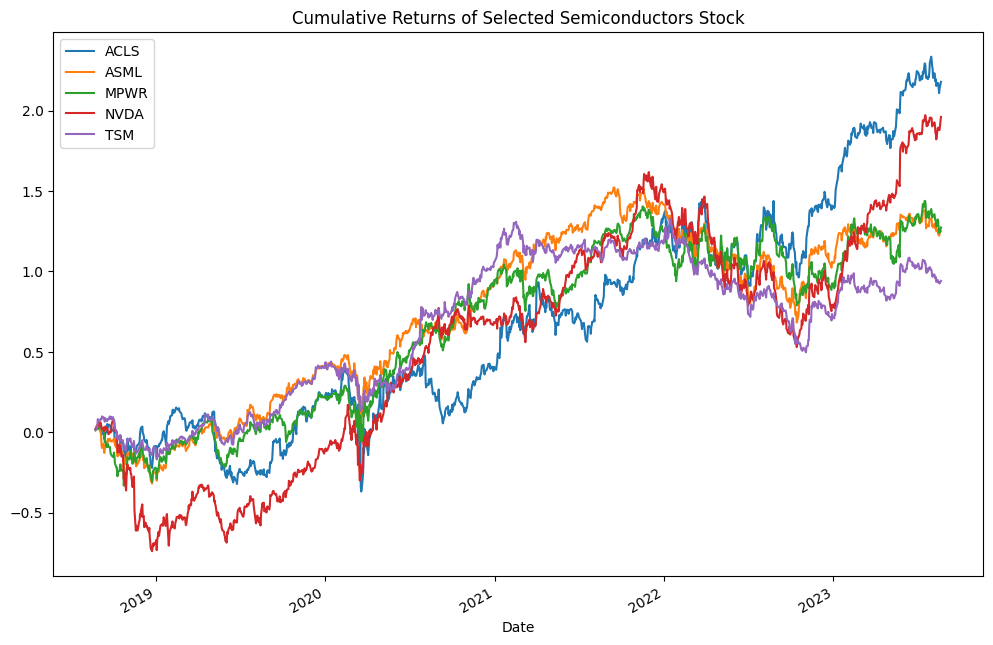

In [35]:
cumulative_log_returns.plot(title = "Cumulative Returns of Selected Semiconductors Stock", figsize = (12,8))
